In [6]:
from math import sqrt
from numpy import concatenate
import numpy as np
from numpy import array

import keras
from keras.models import Sequential
from keras.layers import LSTM, BatchNormalization
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
import tensorflow as tf

from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot as plt
from sodapy import Socrata


In [163]:
#Using the sensor history
sensor_history = pd.read_csv('sensor_history.csv')

In [178]:
#Looking at sensor number 1, Bourke St Mall North
single_sensor = sensor_history[sensor_history.sensor_id == 1].copy()
single_sensor.sort_values('date_time', inplace=True, ascending=True)

In [179]:
#One months worth of data, 24 hours x 7 days x 4 weeks = 672 hours
df2 = single_sensor[:672]

In [180]:
#Showing the data
df2[:672]

,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts
38636,2009-05-01T00:00:00.000,2009,May,1,Friday,0,1,Bourke Street Mall (North),53
38651,2009-05-01T01:00:00.000,2009,May,1,Friday,1,1,Bourke Street Mall (North),43
38666,2009-05-01T02:00:00.000,2009,May,1,Friday,2,1,Bourke Street Mall (North),10
38681,2009-05-01T03:00:00.000,2009,May,1,Friday,3,1,Bourke Street Mall (North),5
38696,2009-05-01T04:00:00.000,2009,May,1,Friday,4,1,Bourke Street Mall (North),25
...,...,...,...,...,...,...,...,...,...
49057,2009-05-28T19:00:00.000,2009,May,28,Thursday,19,1,Bourke Street Mall (North),683
49074,2009-05-28T20:00:00.000,2009,May,28,Thursday,20,1,Bourke Street Mall (North),373
49091,2009-05-28T21:00:00.000,2009,May,28,Thursday,21,1,Bourke Street Mall (North),233
49108,2009-05-28T22:00:00.000,2009,May,28,Thursday,22,1,Bourke Street Mall (North),177


In [182]:
df2.head()

,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts,cycle,trend
38636,2009-05-01T00:00:00.000,2009,May,1,Friday,0,1,Bourke Street Mall (North),53,162.049006,-109.049006
38651,2009-05-01T01:00:00.000,2009,May,1,Friday,1,1,Bourke Street Mall (North),43,-35.449866,78.449866
38666,2009-05-01T02:00:00.000,2009,May,1,Friday,2,1,Bourke Street Mall (North),10,-256.110788,266.110788
38681,2009-05-01T03:00:00.000,2009,May,1,Friday,3,1,Bourke Street Mall (North),5,-449.060357,454.060357
38696,2009-05-01T04:00:00.000,2009,May,1,Friday,4,1,Bourke Street Mall (North),25,-617.169063,642.169063


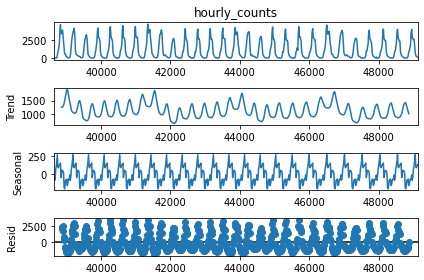

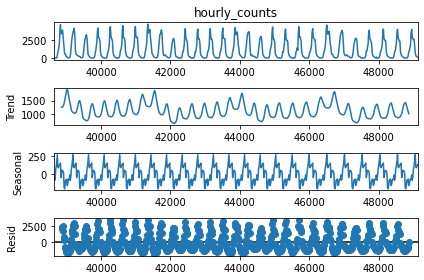

In [197]:
decompose_result = seasonal_decompose(df2['hourly_counts'], model = 'add', period = 30)
decompose_result.plot()

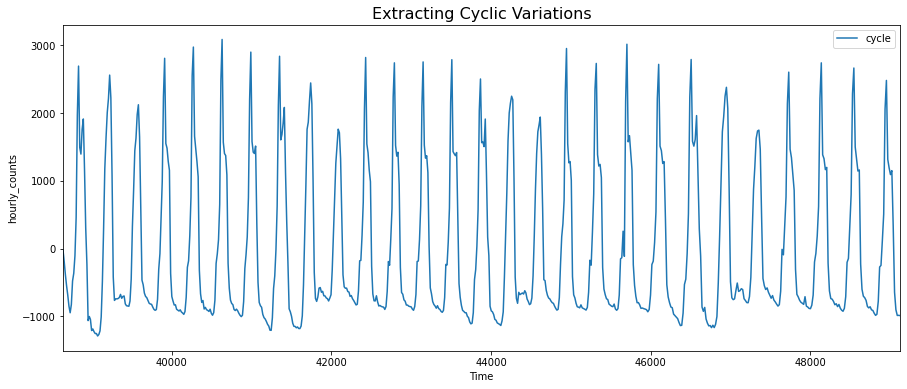

In [187]:
#Looking for cyclic variations in the dataset
#Using 672 hours of data, i.e. 1 month and sensor id 1
from statsmodels.tsa.filters.hp_filter import hpfilter
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
#df = pd.read_csv('sensor_history.csv')
hourly_counts_cycle,hourly_counts_trend = hpfilter(df2['hourly_counts'], lamb=1600)
df2['cycle'] =hourly_counts_cycle
df2['trend'] =hourly_counts_trend
df2[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Time')
plt.ylabel('hourly_counts')
plt.show()

Text(0.5, 1.0, 'Hourly counts detrended by subtracting the least squares fit')

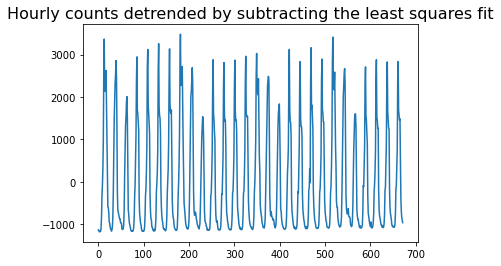

In [188]:
# Using scipy: Subtract the line of best fit
from scipy import signal
#df = pd.read_csv('sensor_history.csv')
detrended = signal.detrend(df2.hourly_counts.values)
plt.plot(detrended)
plt.title('Hourly counts detrended by subtracting the least squares fit', fontsize=16)